In [1]:
import pandas as pd

dados = pd.read_csv('calibração_em_energia.csv')

display(dados)

,Canal,Energia(keV),Nome
0,129,53.537,Am-241
1,311,121.782,Eu-152
2,782,344.281,Eu-152
3,1426,611.660,Cs-137
4,1700,778.903,Eu-152
5,2512,1173.238,Co-60
6,2854,1332.502,Co-60
7,3090,1408.022,Eu-152


In [2]:
from sklearn.linear_model import LinearRegression

# Reshaping necessário para o sklearn
x = dados['Canal'].values.reshape(-1, 1)
y = dados['Energia(keV)'].values

# Criar e ajustar o modelo
modelo = LinearRegression()
modelo.fit(x, y) #aprendizagem de máquina

# Coeficientes
a = modelo.coef_[0]
b = modelo.intercept_

print(f"Equação linear: y = {a:.4f}x{b:.4f}")


Equação linear: y = 0.4684x-21.6782


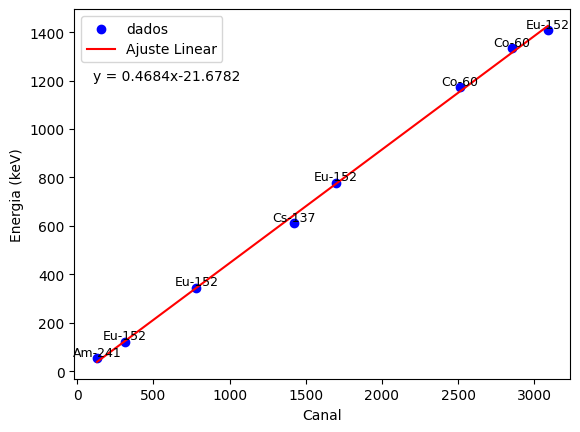

In [3]:
import matplotlib.pyplot as plt

# Plot dos dados
plt.scatter(x, y, label='dados', color='blue')

# Plot da linha ajustada
plt.plot(x, a * x + b, label='Ajuste Linear', color='red')

nomes = dados['Nome'] if 'Nome' in dados.columns else [f'P{i+1}' for i in range(len(x))]
for xi, yi, nome in zip(x, y, nomes):
    plt.text(xi, yi + 10, nome, fontsize=9, color='black', ha='center')

# Adicionando a equação como texto
plt.text(100, 1200, f'y = {a:.4f}x{b:.4f}', fontsize=10, color='black')

plt.xlabel('Canal')
plt.ylabel('Energia (keV)')
plt.legend()
plt.show()


In [4]:
import pandas as pd

dados2 = pd.read_csv('eficiência.csv')

display(dados2)

,Energia(keV),eficiência,Nome
0,53.537,0.294,Am-241
1,121.782,0.070,Eu-152
2,344.281,0.033,Eu-152
3,611.660,0.044,Cs-137
4,778.903,0.015,Eu-152
5,1173.240,0.066,Co-60
6,1332.500,0.071,Co-60
7,1408.020,0.014,Eu-152


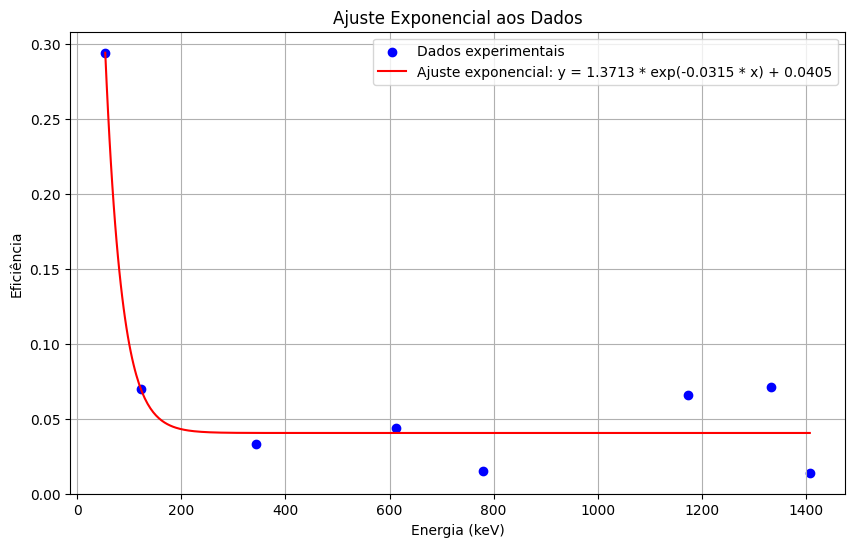

Parâmetros do ajuste: a = 1.3713, b = -0.0315, c = 0.0405


In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Carregar os dados
dados2 = pd.read_csv('eficiência.csv')

# Definir a função exponencial com deslocamento
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Dados de entrada
x_data = dados2['Energia(keV)'].values
y_data = dados2['eficiência'].values

# Ajustar os dados à função exponencial
params, covariance = curve_fit(exponential_func, x_data, y_data, p0=(1, -0.01, 0.01), maxfev=10000)

# Obter os valores ajustados
a_fit, b_fit, c_fit = params

# Gerar valores ajustados para o gráfico
x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = exponential_func(x_fit, a_fit, b_fit, c_fit)

# Plotar os dados e o ajuste
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Dados experimentais')
plt.plot(x_fit, y_fit, color='red', label=f'Ajuste exponencial: y = {a_fit:.4f} * exp({b_fit:.4f} * x) + {c_fit:.4f}')
plt.xlabel('Energia (keV)')
plt.ylabel('Eficiência')
plt.title('Ajuste Exponencial aos Dados')
plt.legend()
plt.grid()
plt.show()

# Exibir os parâmetros ajustados
print(f"Parâmetros do ajuste: a = {a_fit:.4f}, b = {b_fit:.4f}, c = {c_fit:.4f}")
